# Simple Linear Regression


#### Loading modules.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [77]:
#Reading the csv file.
salary = pd.read_csv('resources/salary.csv')
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       513 non-null    float64
 1   exprior      514 non-null    int64  
 2   yearsworked  514 non-null    int64  
 3   yearsrank    514 non-null    int64  
 4   market       514 non-null    float64
 5   degree       514 non-null    int64  
 6   otherqual    514 non-null    int64  
 7   position     514 non-null    int64  
 8   male         514 non-null    int64  
 9   Field        514 non-null    int64  
 10  yearsabs     514 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [78]:
# Filling my NaN value with the mean of the column
salary = salary.apply(lambda x: x.fillna(x.mean()))

In [79]:
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [94]:
correlation = salary.corr()

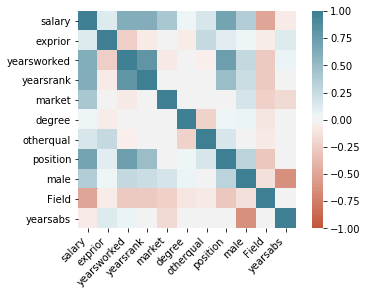

In [104]:
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

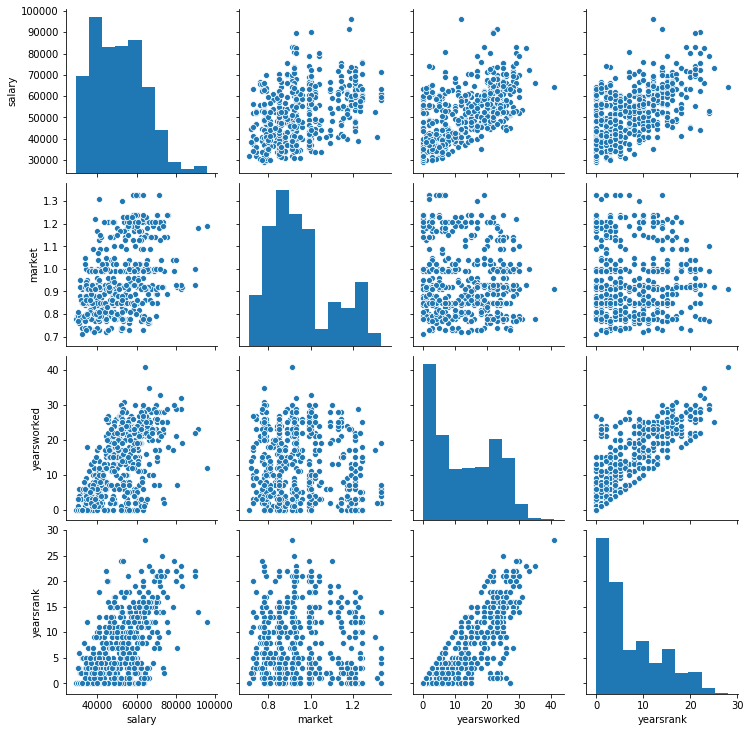

In [115]:

salary_corr = salary[['salary', 'market', 'yearsworked', 'yearsrank']]

sns.pairplot(salary_corr)
plt.show()

In [ ]:
# Take the log of population and gdp_per_capita
salary_corr['log_yearsworked'] = np.log10(salary_corr['yearsworked'])
salary_corr['log_salary'] = np.log10(salary_corr['salary'])

# Drop the non-transformed columns
salary_corr = salary_corr.drop(columns = ['yearsworked', 'salary'])

In [ ]:
sns.pairplot(salary_corr, hue = 'yearsra')

By using ‘.corr()’ and ‘.heatmap()’ I am able to visualize and understand the relationship between our variables.

With our example, we spotted how strong the correlation of years worked, years ranked, market and position are to salary. These variables are factors that actually determine salry in various ways. Looking at the chart we see that the values of correlation are closer to one showing a strong relationship.

In [105]:

# Creating the target variable for the test and training sets of data
X = salary['yearsworked']
y = salary['salary']

# Splitting the data into test and training sets by 75/25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)
print(X_train.shape)


(385,)


In [85]:
missing_values = X_train.isnull().sum().sum()
print('Number of missing values:',missing_values)

highest =  X_train.max()
print('The highest value is: ', highest)

Number of missing values: 0
The highest value is:  41


In [86]:
X_train.describe()

count    385.000000
mean      12.916883
std        9.470533
min        0.000000
25%        4.000000
50%       11.000000
75%       22.000000
max       41.000000
Name: yearsworked, dtype: float64

In [87]:
sns.pairplot(X_train)

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

In [108]:
# Adding a constant.
# X = sm.add_constant(X)

model = sm.OLS(X, y).fit()
# model.summary()



#print the coefficients
print(model.params)
print(model.summary())

salary    0.000265
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:            yearsworked   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              1617.
Date:                Wed, 05 Feb 2020   Prob (F-statistic):                   1.06e-160
Time:                        15:52:50   Log-Likelihood:                         -1786.8
No. Observations:                 514   AIC:                                      3576.
Df Residuals:                     513   BIC:                                      3580.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

In [113]:
predictions = model.predict(y_train)
predictions

278    14.849801
444     9.901369
434     9.670260
154    11.715520
25      8.926312
         ...    
106    17.283334
270    18.259185
348    13.977554
435    14.632473
102    10.737018
Length: 385, dtype: float64

In [111]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

AttributeError: 'OLSResults' object has no attribute 'score'

In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

In [ ]:
# y_pred = model.predict(X)
# print('predicted response:', y_pred)
model.predict([1,20])

In [ ]:
y_pred = model.intercept_ + model.coef_ * X
>>> print('predicted response:', y_pred)